# Imports

In [25]:
import numpy as np
from pathlib import Path
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import os
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd

# Data Processing

In [26]:
"""
    Classe criada para fazer a analise necessária para o arquivo tendo a necedidade apenas da importação da classe
"""


        
class spectro(object):
    def __init__(self, path, HEADER=0, DELIM=';', W=0, I=2):#Inicialização de um spectro com seus parametros.
        #(Acredito faltar otimização mas posso ver com o passar do projeto).
        self.matrix = pd.read_csv(path, sep=DELIM, skiprows=HEADER, header=None).to_numpy()
        self.df = pd.DataFrame()
        self.df['Wavelengths'] = self.matrix[:,W]
        self.df['Intensity'] = self.matrix[:,I]
        self.Wavelengths = []
        self.Intensity = []

    def SNV(self):
        self.MI = np.mean(self.Intensity, axis=0)
        self.DP = np.std(self.Intensity)
        self.filterSNV = (self.Intensity-self.MI)/self.DP
        return self.filterSNV
    pass
        

class Spectro2(spectro):#parametros iniciais do sistema libs Spectro2
    def __init__(self, path, HEADER = 10, DELIM = '	'):
        super().__init__(path, HEADER, DELIM)
        self.Arraymatrix = np.array(self.matrix)


    pass

class Spectro1(spectro):#parametros iniciais do sistema libs Spectro1
    def __init__(self, path, HEADER=40, DELIM=';', W=0, I=2):
        super().__init__(path, HEADER, DELIM)
        self.Matrix = self.df.sort_values(by=['Wavelengths', 'Intensity'])
        self.Arraymatrix = np.array(self.Matrix)
        self.Wavelengths = self.Arraymatrix[:,0]
        self.Intensity = self.Arraymatrix[:,1]

#Definitions

def libsmean_SNV(DIR_Pr, type = 'Spectro1'):
    DIR_Pr = DIR_Pr
    if type == 'Spectro1':
        A = Spectro1(DIR_Pr/'_ (1).esf')
    elif type == "Spectro2":
            A = Spectro2(shot)
    M_SNV = np.zeros(np.shape(A.Intensity)[0])
    all_shot = sorted(os.listdir(DIR_Pr))
    for i in all_shot:
        shot = DIR_Pr.joinpath(i)
        if type == 'Spectro1':
            A = Spectro1(shot)
        elif type == "Spectro2":
            A = Spectro2(shot)
        M_SNV += A.SNV()
    M_SNV /= len(all_shot)  
    return M_SNV

def libsmean(DIR_Pr, type = 'Spectro1'):
    DIR_Pr = DIR_Pr
    if type == 'Spectro1':
        A = Spectro1(DIR_Pr/'_ (1).esf')
    elif type == "Spectro2":
            A = Spectro2(shot)
    M_INTENSITY = np.zeros(np.shape(A.Intensity)[0])
    all_shot = sorted(os.listdir(DIR_Pr))
    for i in all_shot:
        shot = DIR_Pr.joinpath(i)
        if type == 'Spectro1':
            A = Spectro1(shot)
        elif type == "Spectro2":
            A = Spectro2(shot)
        M_INTENSITY += A.Intensity
    M_INTENSITY /= len(all_shot)  
    return M_INTENSITY


def main():
    return 0

if __name__ == '__main__':
    main()
    print(main())

0


# Definitions

In [27]:
def y_m_l(A, B, C): #Criador especifico de grupos de amostra separa em grupos 0 e 1
    a = np.zeros(A)
    b = np.zeros(B)
    c = np.ones(C)
    for i in range(len(b)):
        a[i] += b[i]
    for k in range(len(c)):
        a[i+k+1] += c[k]
    return a

def dirtoread(all_sample, DIR, matrix): #Faz a leitura de todas as pastas
    for i in all_sample:
        sample = DIR.joinpath(i)
        all_piece = sorted(os.listdir(sample))
        for j in all_piece:
            piece = sample.joinpath(j)
            matrix.append(libsmean_SNV(piece))

# Matrix Creation

In [28]:
ROOT = Path('/home/gustavo-fsc/Documents/Program/Spectroscopy/')

""" 
Matriz do primeiro tipo de amostra, amostra sem colágeno. Comprimento de luz
no visível.
"""

matriz = []
DIR_NC = ROOT.joinpath('LIBS/VIS/Amostra A sem colágeno')
all_sample = sorted(os.listdir(DIR_NC))
dirtoread(DIR=DIR_NC, all_sample=all_sample, matrix=matriz)
shape1 = len(matriz)
        
"""
Matriz do segundo tipo de amostra, amos com colágeno. Comprimento de luz
no visível.
"""

DIR_WC = ROOT.joinpath('LIBS/VIS/Amostra B com colágeno')
all_sample = sorted(os.listdir(DIR_WC))
dirtoread(DIR=DIR_WC, all_sample=all_sample, matrix=matriz)
shape2 = len(matriz) - shape1

X = np.array(matriz)
# print(X)
y = np.array(y_m_l(shape1+shape2, shape1, shape2))

# ML

In [29]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [30]:
DIR = [ ROOT.joinpath('LIBS/VIS/Amostra A sem colágeno/Amostra 3/Pedaço 5'), 
        ROOT.joinpath('LIBS/VIS/Amostra B com colágeno/Amostra 3/Pedaço 1'),
        ROOT.joinpath('LIBS/VIS/Amostra B com colágeno/Amostra 3/Pedaço 6'),
        ROOT.joinpath('LIBS/VIS/Amostra A sem colágeno/Amostra 3/Pedaço 4')
        ]

#teste 1
M_SNV = (libsmean_SNV(DIR[0]), libsmean_SNV(DIR[1]), libsmean_SNV(DIR[2]), libsmean_SNV(DIR[3]))

pt= (int(clf.predict([M_SNV[0]])), int(clf.predict([M_SNV[1]])), int(clf.predict([M_SNV[2]])), int(clf.predict([M_SNV[3]])))

print(pt)

(0, 1, 1, 0)


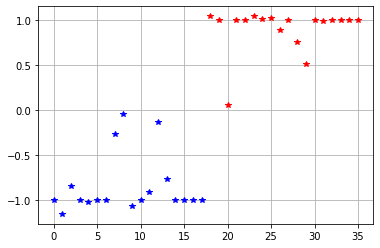

In [31]:
a = clf.decision_function(X)
mask = a>=0
mask1 = a<0
x = np.arange(0,len(a),1)
plt.plot(x[mask] , a[mask], 'r*')
plt.plot(x[mask1] , a[mask1], 'b*')
plt.grid()
plt.show()

In [32]:
print(clf.score(X, y, sample_weight=None))

print('precisão perfeita de amostras')

1.0
precisão perfeita de amostras
